# Introduction

Our telecoms service is investigating customer churn. Namely, we want to develop a classification model to help us better identify which customers will churn. This will enable us to be more proactive in working to improve specific customer's relationship with the business and retain thier business. 

# Import Data + Packages

In [2]:
#importing necessary functions.
import pandas as pd
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, recall_score
from xgboost import XGBRFClassifier,XGBClassifier
from imblearn.over_sampling import SMOTE
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC

In [3]:
#Importing data, originally sourced from Kaggle (https://www.kaggle.com/becksddf/churn-in-telecoms-dataset)

df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Explore Data

## Basic Dataset Exploration

In [4]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.info()

#primarily working with numbers...objects may need to be converted to dummy variables. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [6]:
df.isna().sum()

#No NA values

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
#Phone number is unique, no pattern to be obtained from this data

df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [8]:
#Different scales

df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


14.0 % of customers churn


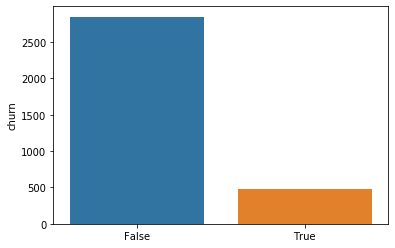

In [9]:
#Heavily skewed towards churn = 0 (as in, customer did not churn)

percent_churn = df.churn.value_counts()[1]/len(df.churn)
sns.barplot(df.churn.unique(), df.churn.value_counts())
print(round(percent_churn*100),"% of customers churn")

## Churn by State

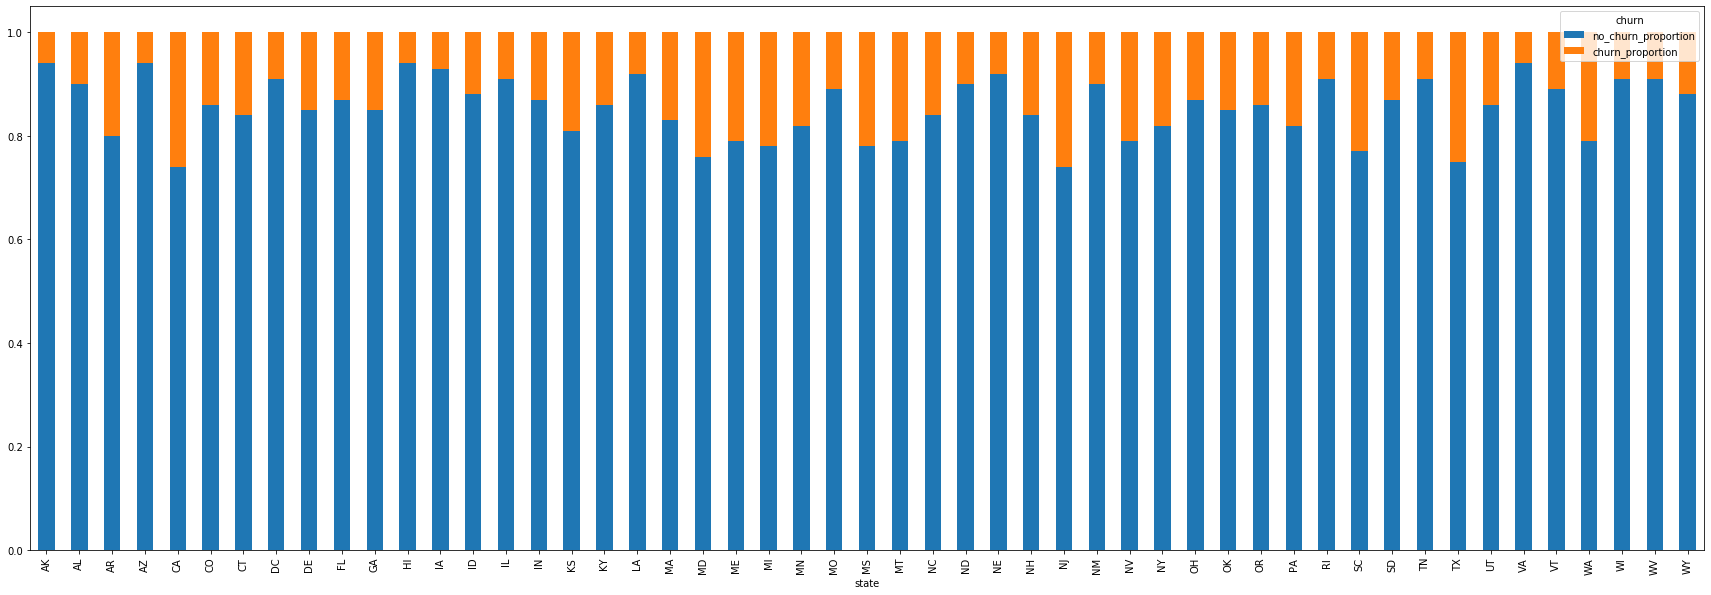

In [10]:
#Churn by state

states_df = df.groupby(["state","churn",]).size().unstack()

no_churn_proportion = []
churn_proportion = []

for row in states_df.index:
    total = states_df.loc[row].sum()
    no_churn = round(states_df.loc[row][0]/total,2)
    churn = round(1-no_churn,2)
    no_churn_proportion.append(no_churn)
    churn_proportion.append(churn)

states_df['no_churn_proportion'] = no_churn_proportion
states_df['churn_proportion'] = churn_proportion

states_df[['no_churn_proportion','churn_proportion']].plot(kind='bar', stacked=True, figsize=(30,10))

In [11]:
#Top churns by state
#NJ, CA, TX, MD and SC have the highest churn rates

states_df.sort_values(by = 'churn_proportion',ascending=False).head()

churn,False,True,no_churn_proportion,churn_proportion
state,,,,
NJ,50,18,0.74,0.26
CA,25,9,0.74,0.26
TX,54,18,0.75,0.25
MD,53,17,0.76,0.24
SC,46,14,0.77,0.23


## Churn by Area Code

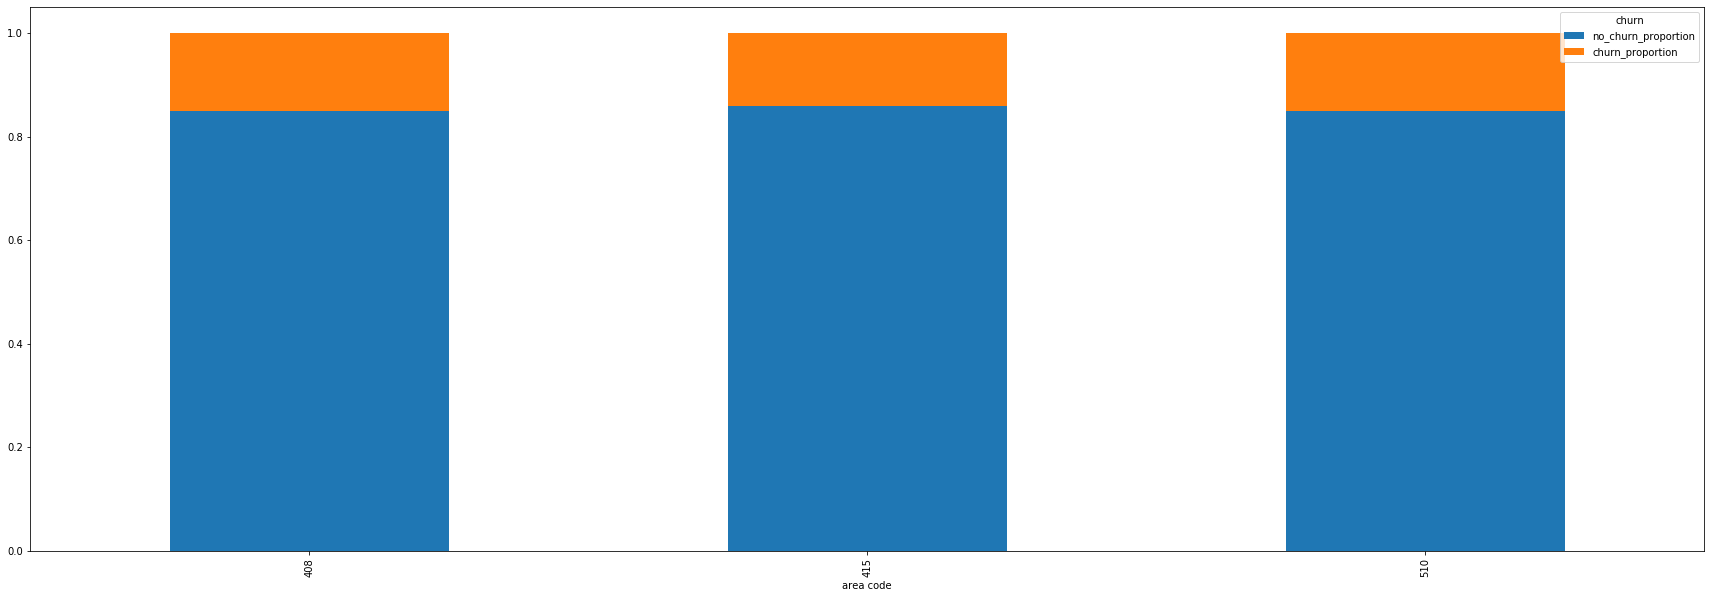

In [13]:
#Churn by area code

area_code_df = df.groupby(["area code","churn"]).size().unstack()

no_churn_proportion = []
churn_proportion = []

for row in area_code_df.index:
    total = area_code_df.loc[row].sum()
    no_churn = round(area_code_df.loc[row][0]/total,2)
    churn = round(1-no_churn,2)
    no_churn_proportion.append(no_churn)
    churn_proportion.append(churn)

area_code_df['no_churn_proportion'] = no_churn_proportion
area_code_df['churn_proportion'] = churn_proportion

area_code_df[['no_churn_proportion','churn_proportion']].plot(kind='bar', stacked=True, figsize=(30,10))

In [14]:
#All roughly the same rate of churn between area codes

area_code_df.sort_values(by = 'churn_proportion',ascending=False).head()

churn,False,True,no_churn_proportion,churn_proportion
area code,,,,
408,716,122,0.85,0.15
510,715,125,0.85,0.15
415,1419,236,0.86,0.14


## Churn by International Plan

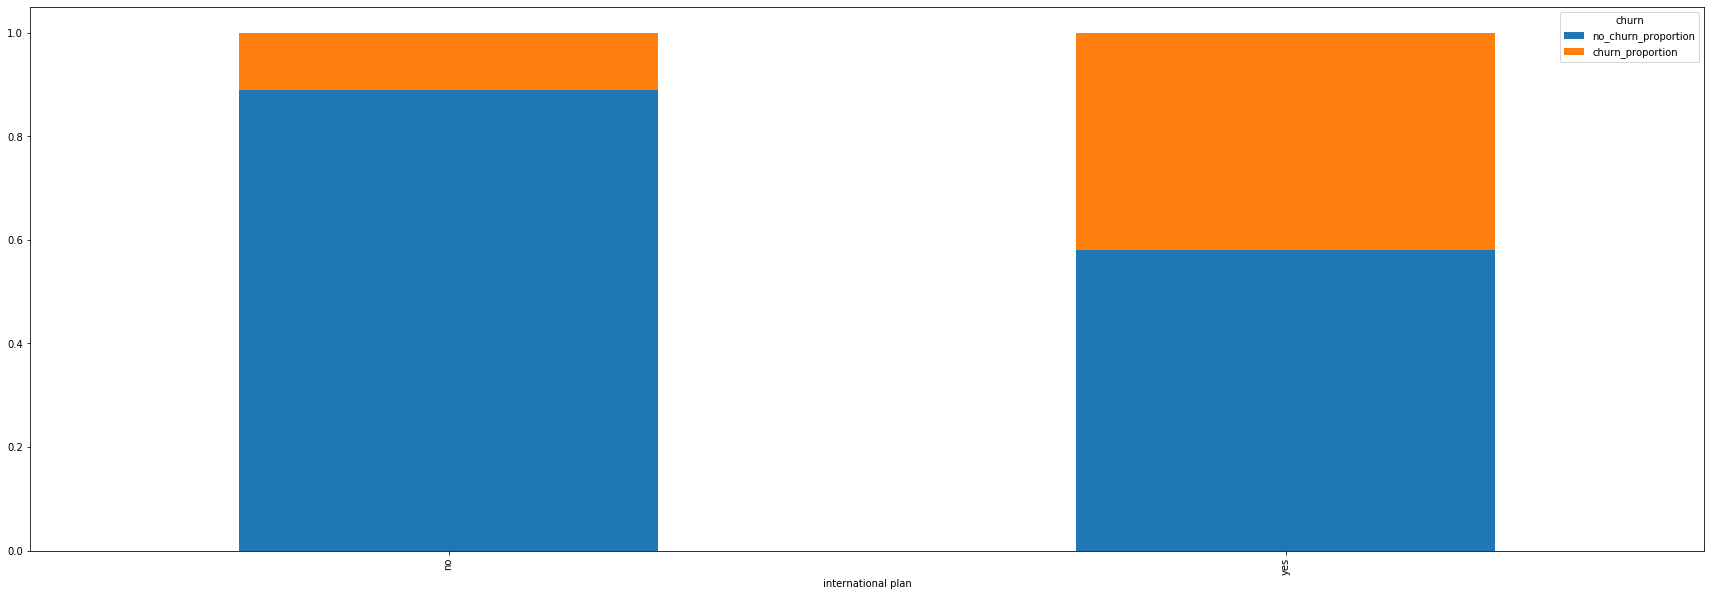

In [15]:
#Churn by international plan

international_plan_df = df.groupby(["international plan","churn",]).size().unstack()

no_churn_proportion = []
churn_proportion = []

for row in international_plan_df.index:
    total = international_plan_df.loc[row].sum()
    no_churn = round(international_plan_df.loc[row][0]/total,2)
    churn = round(1-no_churn,2)
    no_churn_proportion.append(no_churn)
    churn_proportion.append(churn)

international_plan_df['no_churn_proportion'] = no_churn_proportion
international_plan_df['churn_proportion'] = churn_proportion

international_plan_df[['no_churn_proportion','churn_proportion']].plot(kind='bar', stacked=True, figsize=(30,10))

In [16]:
#Those with international plan churn at a higher rate...possibly due to higher cost

international_plan_df.sort_values(by = 'churn_proportion',ascending=False).head()

churn,False,True,no_churn_proportion,churn_proportion
international plan,,,,
yes,186,137,0.58,0.42
no,2664,346,0.89,0.11


## Churn by Voicemail Plan

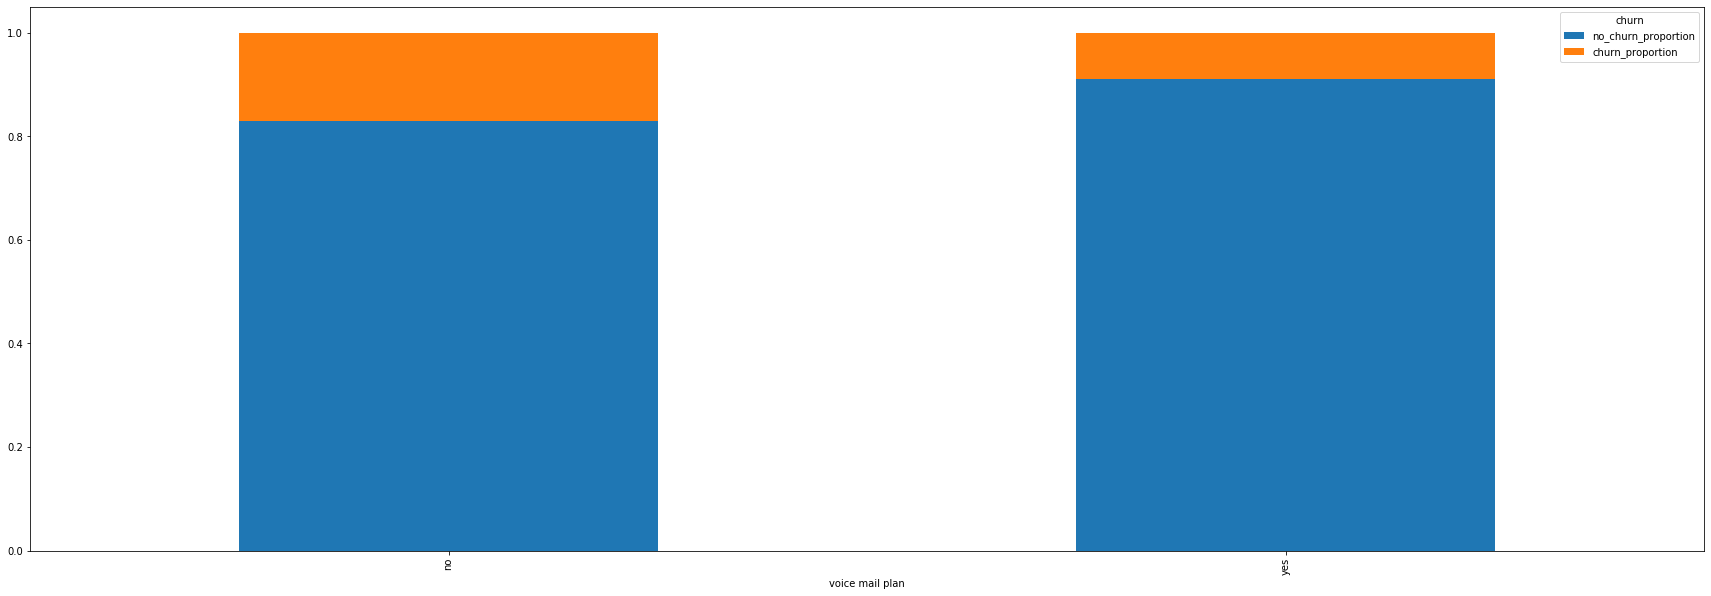

In [17]:
#Churn by voicemail plan

voicemail_plan_df = df.groupby(["voice mail plan","churn",]).size().unstack()

no_churn_proportion = []
churn_proportion = []

for row in voicemail_plan_df.index:
    total = voicemail_plan_df.loc[row].sum()
    no_churn = round(voicemail_plan_df.loc[row][0]/total,2)
    churn = round(1-no_churn,2)
    no_churn_proportion.append(no_churn)
    churn_proportion.append(churn)

voicemail_plan_df['no_churn_proportion'] = no_churn_proportion
voicemail_plan_df['churn_proportion'] = churn_proportion

voicemail_plan_df[['no_churn_proportion','churn_proportion']].plot(kind='bar', stacked=True, figsize=(30,10))

In [18]:
#Those without a voicemail plan churn at a higher rate 

voicemail_plan_df.sort_values(by = 'churn_proportion',ascending=False).head()

churn,False,True,no_churn_proportion,churn_proportion
voice mail plan,,,,
no,2008,403,0.83,0.17
yes,842,80,0.91,0.09


## Churn by number of customer service calls

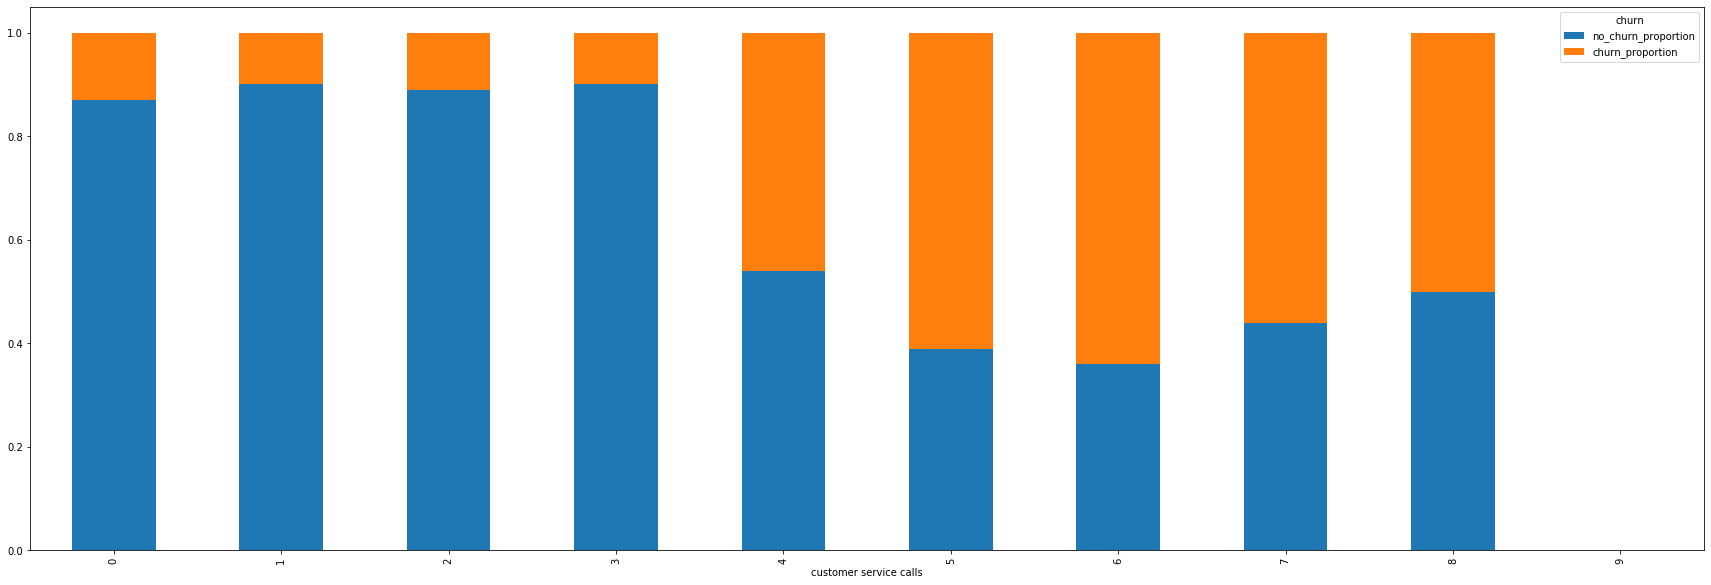

In [19]:
#Churn by customer service calls

customer_service_calls_df = df.groupby(["customer service calls","churn",]).size().unstack()

no_churn_proportion = []
churn_proportion = []

for row in customer_service_calls_df.index:
    total = customer_service_calls_df.loc[row].sum()
    no_churn = round(customer_service_calls_df.loc[row][0]/total,2)
    churn = round(1-no_churn,2)
    no_churn_proportion.append(no_churn)
    churn_proportion.append(churn)

customer_service_calls_df['no_churn_proportion'] = no_churn_proportion
customer_service_calls_df['churn_proportion'] = churn_proportion

customer_service_calls_df[['no_churn_proportion','churn_proportion']].plot(kind='bar', stacked=True, figsize=(30,10))

In [20]:
#More frequent callers are more likely to churn...
#likely calling because they are experiencing issues with the service

customer_service_calls_df.sort_values(by = 'churn_proportion',ascending=False)

churn,False,True,no_churn_proportion,churn_proportion
customer service calls,,,,
6,8.0,14.0,0.36,0.64
5,26.0,40.0,0.39,0.61
7,4.0,5.0,0.44,0.56
8,1.0,1.0,0.50,0.50
4,90.0,76.0,0.54,0.46
0,605.0,92.0,0.87,0.13
2,672.0,87.0,0.89,0.11
1,1059.0,122.0,0.90,0.10
3,385.0,44.0,0.90,0.10


# Cleaning + Preprocessing

## Dropping columns

In [21]:
#Phone number is unique. Dropping

df = df.drop(columns='phone number',axis=1)

## Dummy Variables

In [22]:
#dummy variables 

df = pd.get_dummies(df)

## Train-Test Split

In [23]:
#Setting X and Y

X = df.drop(columns='churn',axis=1)
y = df.churn

In [24]:
#Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=31)

## Scaling

In [25]:
#Scaling X

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X.columns)

## Class Imbalance

In [26]:
#Class imbalance (train data only)

smote = SMOTE()
X_train_smoted, y_train_smoted = smote.fit_sample(X_train_scaled, y_train)
X_train_smoted = pd.DataFrame(X_train_smoted, columns = X.columns)

In [27]:
y_train_smoted.value_counts(normalize=True)

True     0.5
False    0.5
Name: churn, dtype: float64

## Exporting modelling parts for later use

In [100]:
pd.Datay_train_smoted

0       False
1       False
2       False
3       False
4       False
        ...  
4277     True
4278     True
4279     True
4280     True
4281     True
Name: churn, Length: 4282, dtype: bool

In [103]:
X_train_smoted.to_csv('X_train_smoted_csv',index=False)
y_train_smoted.to_csv('y_train_smoted_csv',header="Churn",index=False)
X_test_scaled.to_csv('X_test_scaled_csv',index=False)
y_test.to_csv('y_test_csv',header="Churn",index=False)

# Testing Models

We're going to run the "un-tuned" version of various models and move forward and tune the top 3. The following will be tested:

- KNN
- Naive Bayes
- Decision Trees
- Bagged Trees
- Random Forest
- Adaboost
- Gradient Boosting
- XGBoost
- SVM

## Model Formula

In [28]:
#Creating a df to store the results in

results_df = pd.DataFrame(columns=['model','precision','accuracy','recall','f1'])

In [29]:
def quick_model(model, model_name):
    label = print("Model:",model_name)
    model.fit(X_train_smoted,y_train_smoted)
    
    #training
    print("")
    print("--------------------------------")
    print("Train Data")
    print("--------------------------------")
    print("")
    y_train_pred = model.predict(X_train_smoted)
    print(classification_report(y_train_smoted, y_train_pred))
    
    

    #testing
    print("--------------------------------")
    print("Test Data")
    print("--------------------------------")
    print("")
    y_test_pred = model.predict(X_test_scaled)
    print(classification_report(y_test, y_test_pred)) 
    
    results = {'model': model_name}
    results['precision'] = precision_score(y_test, y_test_pred)
    results['accuracy'] = accuracy_score(y_test, y_test_pred)
    results['recall'] = recall_score(y_test, y_test_pred)
    results['f1'] = f1_score(y_test, y_test_pred)
    
    
    #Confusion Matrix
    print("--------------------------------")
    print("Confusion Matrix")
    print("--------------------------------")
    print("")
    plot_confusion_matrix(model,X_test_scaled, y_test,normalize='true',cmap=plt.cm.Blues)
    plt.show()
    print("")
    cdf = pd.DataFrame(confusion_matrix(y_test, y_test_pred),index=['True 0', 'True 1'], 
    columns=['Predicted 0', 'Predicted 1'])
    print(cdf)

    return results

## KNN

In [86]:
# find best n_neighbors 
best_n = 0
best_score = 0.0
for n in range(1, 101, 1):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_smoted, y_train_smoted)
    y_pred = knn.predict(X_test_scaled)
    f1 = f1_score(y_test, y_pred)
    if f1 > best_score:
        best_n = n
        best_score = f1

print("Best Value for k: {}".format(best_n))
print("F1-Score: {}".format(best_score))


Best Value for k: 16
F1-Score: 0.347394540942928


Model: K Nearest Neighbors

--------------------------------
Train Data
--------------------------------

              precision    recall  f1-score   support

       False       0.91      0.74      0.82      2141
        True       0.78      0.93      0.85      2141

    accuracy                           0.84      4282
   macro avg       0.85      0.84      0.83      4282
weighted avg       0.85      0.84      0.83      4282

--------------------------------
Test Data
--------------------------------

              precision    recall  f1-score   support

       False       0.90      0.71      0.79       709
        True       0.25      0.56      0.35       125

    accuracy                           0.68       834
   macro avg       0.58      0.63      0.57       834
weighted avg       0.80      0.68      0.73       834

--------------------------------
Confusion Matrix
--------------------------------



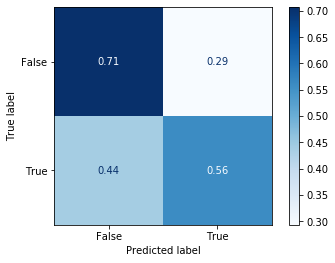


        Predicted 0  Predicted 1
True 0          501          208
True 1           55           70


In [93]:
knn = KNeighborsClassifier(n_neighbors=best_n)
knn_results = quick_model(knn, 'K Nearest Neighbors')
knn_df = pd.DataFrame([knn_results], columns=knn_results.keys())
results_df = results_df.append(knn_df)

## Naive Bayes

Model: Naive Bayes

--------------------------------
Train Data
--------------------------------

              precision    recall  f1-score   support

       False       0.71      0.51      0.59      2141
        True       0.62      0.80      0.70      2141

    accuracy                           0.65      4282
   macro avg       0.67      0.65      0.64      4282
weighted avg       0.67      0.65      0.64      4282

--------------------------------
Test Data
--------------------------------

              precision    recall  f1-score   support

       False       0.88      0.54      0.67       709
        True       0.18      0.58      0.28       125

    accuracy                           0.54       834
   macro avg       0.53      0.56      0.47       834
weighted avg       0.78      0.54      0.61       834

--------------------------------
Confusion Matrix
--------------------------------



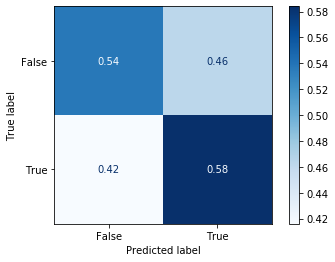


        Predicted 0  Predicted 1
True 0          381          328
True 1           52           73


In [33]:
nb = GaussianNB()
nb_results = quick_model(nb, 'Naive Bayes')
nb_df = pd.DataFrame([nb_results], columns=nb_results.keys())
results_df = results_df.append(nb_df)

## Decision Tree

Model: Decision Tree

--------------------------------
Train Data
--------------------------------

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2141
        True       1.00      1.00      1.00      2141

    accuracy                           1.00      4282
   macro avg       1.00      1.00      1.00      4282
weighted avg       1.00      1.00      1.00      4282

--------------------------------
Test Data
--------------------------------

              precision    recall  f1-score   support

       False       0.96      0.92      0.94       709
        True       0.63      0.76      0.69       125

    accuracy                           0.90       834
   macro avg       0.79      0.84      0.81       834
weighted avg       0.91      0.90      0.90       834

--------------------------------
Confusion Matrix
--------------------------------



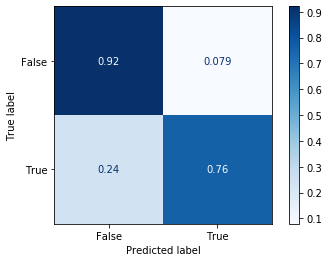


        Predicted 0  Predicted 1
True 0          653           56
True 1           30           95


In [34]:
dt = DecisionTreeClassifier()
dt_results = quick_model(dt, 'Decision Tree')
dt_df = pd.DataFrame([dt_results], columns=dt_results.keys())
results_df = results_df.append(dt_df)

## Bagged Trees

Model: Bagged Trees

--------------------------------
Train Data
--------------------------------

              precision    recall  f1-score   support

       False       0.99      1.00      1.00      2141
        True       1.00      0.99      1.00      2141

    accuracy                           1.00      4282
   macro avg       1.00      1.00      1.00      4282
weighted avg       1.00      1.00      1.00      4282

--------------------------------
Test Data
--------------------------------

              precision    recall  f1-score   support

       False       0.95      0.97      0.96       709
        True       0.79      0.70      0.75       125

    accuracy                           0.93       834
   macro avg       0.87      0.84      0.85       834
weighted avg       0.93      0.93      0.93       834

--------------------------------
Confusion Matrix
--------------------------------



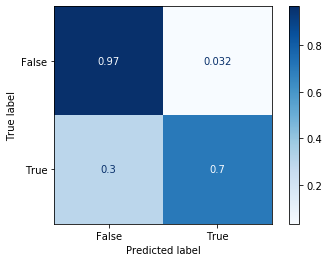


        Predicted 0  Predicted 1
True 0          686           23
True 1           37           88


In [35]:
bt = BaggingClassifier()
bt_results = quick_model(bt, 'Bagged Trees')
bt_df = pd.DataFrame([bt_results], columns=bt_results.keys())
results_df = results_df.append(bt_df)

## Random Forest

Model: Random Forest

--------------------------------
Train Data
--------------------------------

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2141
        True       1.00      1.00      1.00      2141

    accuracy                           1.00      4282
   macro avg       1.00      1.00      1.00      4282
weighted avg       1.00      1.00      1.00      4282

--------------------------------
Test Data
--------------------------------

              precision    recall  f1-score   support

       False       0.95      0.95      0.95       709
        True       0.72      0.70      0.71       125

    accuracy                           0.91       834
   macro avg       0.83      0.82      0.83       834
weighted avg       0.91      0.91      0.91       834

--------------------------------
Confusion Matrix
--------------------------------



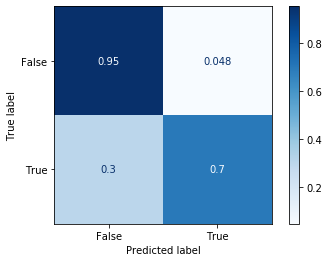


        Predicted 0  Predicted 1
True 0          675           34
True 1           38           87


In [36]:
rf = RandomForestClassifier()
rf_results = quick_model(rf, 'Random Forest')
rf_df = pd.DataFrame([rf_results], columns=rf_results.keys())
results_df = results_df.append(rf_df)

## Adaboost

Model: Adaboost

--------------------------------
Train Data
--------------------------------

              precision    recall  f1-score   support

       False       0.90      0.91      0.90      2141
        True       0.91      0.90      0.90      2141

    accuracy                           0.90      4282
   macro avg       0.90      0.90      0.90      4282
weighted avg       0.90      0.90      0.90      4282

--------------------------------
Test Data
--------------------------------

              precision    recall  f1-score   support

       False       0.92      0.91      0.91       709
        True       0.52      0.55      0.53       125

    accuracy                           0.86       834
   macro avg       0.72      0.73      0.72       834
weighted avg       0.86      0.86      0.86       834

--------------------------------
Confusion Matrix
--------------------------------



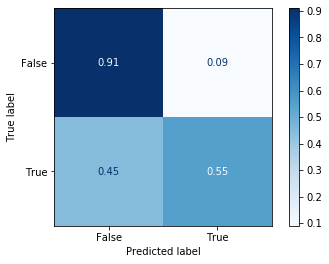


        Predicted 0  Predicted 1
True 0          645           64
True 1           56           69


In [37]:
ab = AdaBoostClassifier()
ab_results = quick_model(ab, 'Adaboost')
ab_df = pd.DataFrame([ab_results], columns=ab_results.keys())
results_df = results_df.append(ab_df)

## Gradient Boosting

Model: Gradient Boosting

--------------------------------
Train Data
--------------------------------

              precision    recall  f1-score   support

       False       0.96      0.98      0.97      2141
        True       0.98      0.95      0.97      2141

    accuracy                           0.97      4282
   macro avg       0.97      0.97      0.97      4282
weighted avg       0.97      0.97      0.97      4282

--------------------------------
Test Data
--------------------------------

              precision    recall  f1-score   support

       False       0.96      0.97      0.97       709
        True       0.84      0.77      0.80       125

    accuracy                           0.94       834
   macro avg       0.90      0.87      0.89       834
weighted avg       0.94      0.94      0.94       834

--------------------------------
Confusion Matrix
--------------------------------



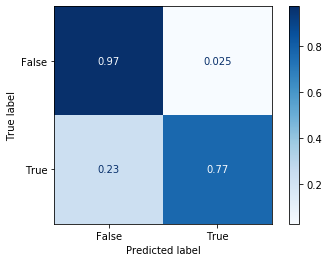


        Predicted 0  Predicted 1
True 0          691           18
True 1           29           96


In [38]:
gb = GradientBoostingClassifier()
gb_results = quick_model(gb, 'Gradient Boosting')
gb_df = pd.DataFrame([gb_results], columns=gb_results.keys())
results_df = results_df.append(gb_df)

## XGBoost

Model: XGBoost

--------------------------------
Train Data
--------------------------------

              precision    recall  f1-score   support

       False       0.95      0.98      0.97      2141
        True       0.98      0.95      0.97      2141

    accuracy                           0.97      4282
   macro avg       0.97      0.97      0.97      4282
weighted avg       0.97      0.97      0.97      4282

--------------------------------
Test Data
--------------------------------

              precision    recall  f1-score   support

       False       0.96      0.98      0.97       709
        True       0.85      0.75      0.80       125

    accuracy                           0.94       834
   macro avg       0.90      0.86      0.88       834
weighted avg       0.94      0.94      0.94       834

--------------------------------
Confusion Matrix
--------------------------------



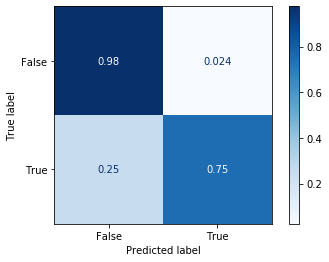


        Predicted 0  Predicted 1
True 0          692           17
True 1           31           94


In [39]:
xb = XGBClassifier()
xb_results = quick_model(xb, 'XGBoost')
xb_df = pd.DataFrame([xb_results], columns=xb_results.keys())
results_df = results_df.append(xb_df)

## SVM

Model: SVM

--------------------------------
Train Data
--------------------------------

              precision    recall  f1-score   support

       False       0.97      0.92      0.94      2141
        True       0.92      0.97      0.94      2141

    accuracy                           0.94      4282
   macro avg       0.94      0.94      0.94      4282
weighted avg       0.94      0.94      0.94      4282

--------------------------------
Test Data
--------------------------------

              precision    recall  f1-score   support

       False       0.91      0.89      0.90       709
        True       0.46      0.53      0.49       125

    accuracy                           0.83       834
   macro avg       0.68      0.71      0.70       834
weighted avg       0.85      0.83      0.84       834

--------------------------------
Confusion Matrix
--------------------------------



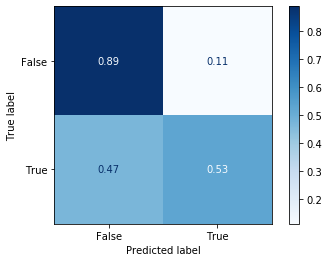


        Predicted 0  Predicted 1
True 0          630           79
True 1           59           66


In [40]:
svm = SVC()
svm_results = quick_model(svm, 'SVM')
svm_df = pd.DataFrame([svm_results], columns=svm_results.keys())
results_df = results_df.append(svm_df)

# Initial Model Evaluation

## How are we evaluating our models?

To better understand why a customer churns, we want to ensure our model has high <b>recall</b> and <b>precision scores</b>. 

Recall is especially important because a higher recall score ensures we are accurately predicting who will churn (there is a high cost associated with False Negative i.e, predicting someone will not churn and they actually do churn). Recall tells us what percentage of customers that end up churning the algorithm successfully finds. It is important that we manage against false negatives as these would lead us to miss a customer's potential to churn and, in turn, lose business. 

Precision will give us a sense of how well the model does at predicting churn. This differs from recall in that false positives (predicting churn that doesn't happen) are of a higher cost(instead of false negatives). It is important that our precision score is also high so we don't waste resources trying to prevent churn on people who won't churn. 

## Model Ranking

In [94]:
#Sorting by recall then precision
results_df.sort_values(by=['recall','precision'],ascending=False).reset_index(drop=True)

,model,precision,accuracy,recall,f1
0,Gradient Boosting,0.842105,0.943645,0.768,0.803347
1,Decision Tree,0.629139,0.896882,0.760,0.688406
2,XGBoost,0.846847,0.942446,0.752,0.796610
3,Bagged Trees,0.792793,0.928058,0.704,0.745763
4,Random Forest,0.719008,0.913669,0.696,0.707317
5,Naive Bayes,0.182045,0.544365,0.584,0.277567
6,K Nearest Neighbors,0.251799,0.684652,0.560,0.347395
7,Adaboost,0.518797,0.856115,0.552,0.534884
8,SVM,0.455172,0.834532,0.528,0.488889


Based on the recall and precision scores, we'll move forward by refining the <b>Gradient Boosting, XGBoost and Bagged Tree Models</b> using Gridsearch. 

While Decision Trees demonstrated the high recall score, the precision score is one of the lowest. 

In [42]:
# Storing this df for quicker access later

results_df.sort_values(by=['recall','precision'],ascending=False).reset_index(drop=True).to_csv('vanilla_models_df',index=False)

# Refining models using GridSearch

In [62]:
#Adjusting this formula to also save the best parameters for future use

def quick_model_gridsearch(model, model_name):
    label = print("Model:",model_name)
    model.fit(X_train_smoted,y_train_smoted)
    
    #training
    print("")
    print("--------------------------------")
    print("Train Data")
    print("--------------------------------")
    print("")
    y_train_pred = model.predict(X_train_smoted)
    print(classification_report(y_train_smoted, y_train_pred))
    
    

    #testing
    print("--------------------------------")
    print("Test Data")
    print("--------------------------------")
    print("")
    y_test_pred = model.predict(X_test_scaled)
    print(classification_report(y_test, y_test_pred))
    print("")
    print("")
    print(model.best_params_)
    
    results = {'model': model_name}
    results['precision'] = precision_score(y_test, y_test_pred)
    results['accuracy'] = accuracy_score(y_test, y_test_pred)
    results['recall'] = recall_score(y_test, y_test_pred)
    results['f1'] = f1_score(y_test, y_test_pred)
    results['best_params'] = model.best_params_
    
    
    #Confusion Matrix
    print("--------------------------------")
    print("Confusion Matrix")
    print("--------------------------------")
    print("")
    plot_confusion_matrix(model,X_test_scaled, y_test,normalize='true',cmap=plt.cm.Blues)
    plt.show()
    print("")
    cdf = pd.DataFrame(confusion_matrix(y_test, y_test_pred),index=['True 0', 'True 1'], 
    columns=['Predicted 0', 'Predicted 1'])
    print(cdf)

    return results

In [63]:
refined_results_df = pd.DataFrame(columns=['model','precision','accuracy','recall','f1','best_params'])

## Gradient Boosting

In [64]:
param_grid = {
    "learning_rate": [0.1,0.01,0.5],
    'max_depth': [2, 3,4, 6],
    "min_samples_split": [2,4,6],
    "min_samples_leaf": [1,2,4,6],
    'subsample': [0.7,1],
    'n_estimators': [5, 30, 100, 250],
}

Model: Gradient Boosting GridSearch

--------------------------------
Train Data
--------------------------------

              precision    recall  f1-score   support

       False       0.97      0.99      0.98      2141
        True       0.98      0.96      0.97      2141

    accuracy                           0.98      4282
   macro avg       0.98      0.98      0.98      4282
weighted avg       0.98      0.98      0.98      4282

--------------------------------
Test Data
--------------------------------

              precision    recall  f1-score   support

       False       0.96      0.97      0.97       709
        True       0.83      0.77      0.80       125

    accuracy                           0.94       834
   macro avg       0.89      0.87      0.88       834
weighted avg       0.94      0.94      0.94       834



{'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 30, 'subsample': 0.7}
----------------------------

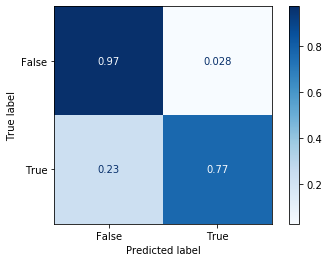


        Predicted 0  Predicted 1
True 0          689           20
True 1           29           96


In [65]:
gb = GradientBoostingClassifier()
grid_gb = GridSearchCV(gb, param_grid, scoring='recall', cv=3, n_jobs=1)
grid_gb_results = quick_model_gridsearch(grid_gb, 'Gradient Boosting GridSearch')
grid_gb_results_df = pd.DataFrame([grid_gb_results], columns=grid_gb_results.keys())
refined_results_df = refined_results_df.append(grid_gb_results_df)

In [66]:
refined_results_df[refined_results_df.model == 'Gradient Boosting GridSearch']

,model,precision,accuracy,recall,f1,best_params
0,Gradient Boosting GridSearch,0.827586,0.941247,0.768,0.79668,"{'learning_rate': 0.1, 'max_depth': 6, 'min_sa..."


In [95]:
results_df[results_df.model == 'Gradient Boosting']

,model,precision,accuracy,recall,f1
0,Gradient Boosting,0.842105,0.943645,0.768,0.803347


In [68]:
grid_gb_results_df

,model,precision,accuracy,recall,f1,best_params
0,Gradient Boosting GridSearch,0.827586,0.941247,0.768,0.79668,"{'learning_rate': 0.1, 'max_depth': 6, 'min_sa..."


In [69]:
gb_best_params = grid_gb_results_df['best_params']

## XGBoost

In [70]:
param_grid = {
    "learning_rate": [0.1,0.3,0.01,0.5],
    'gamma': [0,0.5, 1, 1.5, 2, 5],
    'max_depth': [2,3,4,6,8,10],
    'min_child_weight': [1,3,5,7,9,10],
    'subsample': [0.7,1],
    'n_estimators': [5, 10, 15, 20, 25, 50,75, 100],
}

Model: XGBoost GridSearch

--------------------------------
Train Data
--------------------------------

              precision    recall  f1-score   support

       False       0.99      1.00      1.00      2141
        True       1.00      0.99      1.00      2141

    accuracy                           1.00      4282
   macro avg       1.00      1.00      1.00      4282
weighted avg       1.00      1.00      1.00      4282

--------------------------------
Test Data
--------------------------------

              precision    recall  f1-score   support

       False       0.96      0.98      0.97       709
        True       0.87      0.78      0.82       125

    accuracy                           0.95       834
   macro avg       0.91      0.88      0.89       834
weighted avg       0.95      0.95      0.95       834



{'gamma': 0, 'learning_rate': 0.3, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 20, 'subsample': 1}
--------------------------------
Confusion Matrix
-

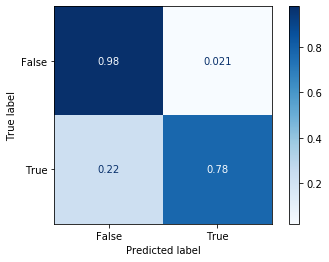


        Predicted 0  Predicted 1
True 0          694           15
True 1           28           97


In [71]:
xb = XGBClassifier()
grid_xb = GridSearchCV(xb, param_grid, scoring='recall', cv=3, n_jobs=1)
grid_xb_results = quick_model_gridsearch(grid_xb, 'XGBoost GridSearch')
grid_xb_results_df = pd.DataFrame([grid_xb_results], columns=grid_xb_results.keys())
refined_results_df = refined_results_df.append(grid_xb_results_df)

In [72]:
refined_results_df[refined_results_df.model == 'XGBoost GridSearch']

,model,precision,accuracy,recall,f1,best_params
0,XGBoost GridSearch,0.866071,0.948441,0.776,0.818565,"{'gamma': 0, 'learning_rate': 0.3, 'max_depth'..."


In [73]:
results_df[results_df.model == 'XGBoost']

,model,precision,accuracy,recall,f1
0,XGBoost,0.846847,0.942446,0.752,0.79661


In [74]:
xb_best_params = grid_xb_results['best_params']

## Bagged Tree

In [80]:
param_grid = {
    'bootstrap': [True,False],
    'bootstrap_features':  [True,False],
    'max_features': [0.05, 0.1, 0.2, 0.5,1.0],
    'max_samples' : [0.05, 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'n_estimators': [10,20,30,40,50,100,500,1000]
}

Model: Bagged Trees GridSearch

--------------------------------
Train Data
--------------------------------

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2141
        True       1.00      1.00      1.00      2141

    accuracy                           1.00      4282
   macro avg       1.00      1.00      1.00      4282
weighted avg       1.00      1.00      1.00      4282

--------------------------------
Test Data
--------------------------------

              precision    recall  f1-score   support

       False       0.96      0.98      0.97       709
        True       0.85      0.74      0.79       125

    accuracy                           0.94       834
   macro avg       0.90      0.86      0.88       834
weighted avg       0.94      0.94      0.94       834



{'bootstrap': False, 'bootstrap_features': True, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 500}
--------------------------------
Confusion Mat

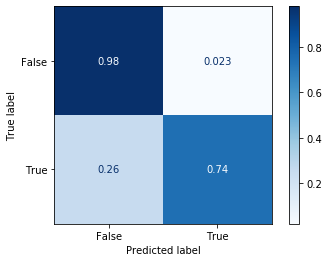


        Predicted 0  Predicted 1
True 0          693           16
True 1           32           93


In [81]:
bt = BaggingClassifier()
grid_bt = GridSearchCV(bt, param_grid, scoring='recall', cv=None, n_jobs=1)
grid_bt_results = quick_model_gridsearch(grid_bt, 'Bagged Trees GridSearch')
grid_bt_results_df = pd.DataFrame([grid_bt_results], columns=grid_bt_results.keys())
refined_results_df = refined_results_df.append(grid_bt_results_df)

In [82]:
refined_results_df[refined_results_df.model == 'Bagged Trees GridSearch']

,model,precision,accuracy,recall,f1,best_params
0,Bagged Trees GridSearch,0.853211,0.942446,0.744,0.794872,"{'bootstrap': False, 'bootstrap_features': Tru..."


In [83]:
results_df[results_df.model == 'Bagged Trees']

,model,precision,accuracy,recall,f1
0,Bagged Trees,0.792793,0.928058,0.704,0.745763


## Summary of results

In [87]:
refined_results_df

,model,precision,accuracy,recall,f1,best_params
0,Gradient Boosting GridSearch,0.827586,0.941247,0.768,0.796680,"{'learning_rate': 0.1, 'max_depth': 6, 'min_sa..."
0,XGBoost GridSearch,0.866071,0.948441,0.776,0.818565,"{'gamma': 0, 'learning_rate': 0.3, 'max_depth'..."
0,Bagged Trees GridSearch,0.853211,0.942446,0.744,0.794872,"{'bootstrap': False, 'bootstrap_features': Tru..."


In [84]:
# Storing this df for quicker access later

refined_results_df.to_csv('gridsearch_models_df',index=False)

In [ ]:
#continuing evaluation in next notebook, project-part-2